# Classifying Most Negative and Positives Reviews
### Natural Language Processing (NLP) 

In [9]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
from nltk.tokenize import TreebankWordTokenizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.util import ngrams
from textblob import TextBlob

In [10]:
#Downloads the nltk data
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

http://text-processing.com/demo/tokenize/

http://language.worldofcomputing.net/pos-tagging/parts-of-speech-tagging.html

In [11]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
#Load in yelp review data
path = "yelp.csv"
yelp = pd.read_csv(path, encoding='unicode-escape')
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [13]:
#Read first review
review = yelp.text[0]
review

u'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\r\n\r\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\r\n\r\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\r\n\r\nAnyway, I can\'t wait to go back!'

In [14]:
yelp.stars.unique()

array([5, 4, 2, 3, 1])

In [15]:
#Textblob review and get its sentiments scores
blob = TextBlob(review)
blob.sentiment

Sentiment(polarity=0.40246913580246907, subjectivity=0.6591122868900646)

In [16]:
#Calculate polarity and subjectivity scores for entire corpus
# by applying polarity and sentiment over yelp reviews df
yelp["polarity"] = yelp.text.apply(lambda x:TextBlob(x).polarity)
yelp["subjectivity"] = yelp.text.apply(lambda x:TextBlob(x).subjectivity)

### Most negative and positives reviews

In [17]:
#Adjust settings
pd.set_option('max_colwidth', 500)

In [18]:
#Most negative
yelp[yelp.polarity == -1].text.head()

773     This was absolutely horrible. I got the supreme pizza with the mystery meats.  I threw it in the trash. I will wait until I get to my destination to eat. Horrible!!!
1517                                                                                                                                      Nasty workers and over priced trash
3266                                                                                                         Absolutely awful... these guys have NO idea what they are doing!
4766                                                                                                                                                           Very bad food!
5812                                                                                                                            I wouldn't send my worst enemy to this place.
Name: text, dtype: object

In [19]:
#Most positive
yelp[yelp.polarity == 1].text.head()

254                                                                                                                                                                             Our server Gary was awesome. Food was amazing...an experience.
347                                                                                                                                                           3 syllables for this place. \r\nA-MAZ-ING!\r\n\r\nThe best Phoenix has to offer.
420                                                                                                                                                                                                                          LOVE the food!!!!
459    Love it!!! Wish we still lived in Arizona as Chino is the one thing we miss. Every time I think about Chino Bandido my mouth starts watering. If I am ever in the state again I will drive out of my way just to go to it again. YUMMY!
679                                         

### Reviews with 5 stars but low polarity scores

In [20]:
yelp[(yelp.stars == 5) & (yelp.polarity < -0.3)]["text"].head(2)

390     RIP AZ Coffee Connection.  :(  I stopped by two days ago unaware that they had closed.  I am severely bummed.  This place is irreplaceable!  Damn you, Starbucks and McDonalds!
1287                                             Obsessed. Like, I've-got-the-Twangy-Tart-withdrawal-shakes level of addiction to this place. Please make one in Arcadia! Pleeeaaassse.
Name: text, dtype: object

### One star reviews with high polarity scores

In [21]:
yelp[(yelp.stars == 1) & (yelp.polarity > 0.5)]["text"].head(2)

1781                                                                                                                                                                                                                                                                     If you like the stuck up Scottsdale vibe this is a good place for you. The food isn't impressive. Nice outdoor seating.
2353    My co-workers and I refer to this place as "Pizza n' Ants".  The staff will be happy to serve you with bare hands, right after using the till.  Also, as the nickname suggests, there has been a noticable insect problem. \r\r\n\r\r\nAs if that could all be overlooked, the pizza isn't even good.  If you are in this part of town, go to Z Pizza or Slices for great pizza instead!
Name: text, dtype: object

### Histogram of polarity scores

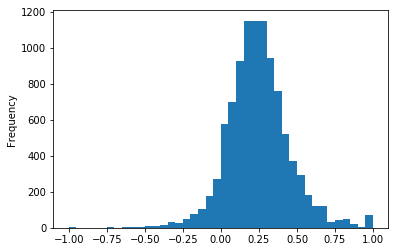

In [22]:
yelp.polarity.plot(kind="hist", bins=40);

### Histogram of subjectivity scores

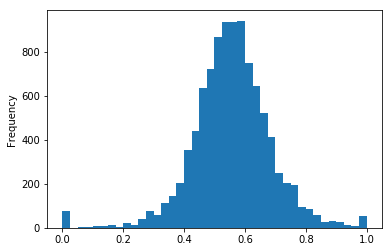

In [23]:
yelp.subjectivity.plot(kind="hist", bins=40)

### Scatter plot of polarity vs subjectivity scores

Text(0,0.5,u'Subjectivity Scores')

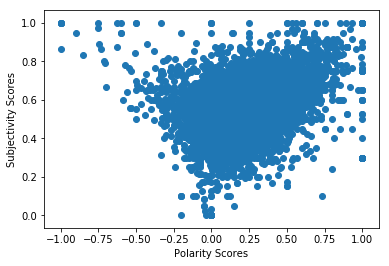

In [24]:
plt.scatter(yelp.polarity, yelp.subjectivity)
plt.xlabel("Polarity Scores")
plt.ylabel("Subjectivity Scores")

### Plot boxplots of the polarity by yelp stars

/Users/anapaulavarejao/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


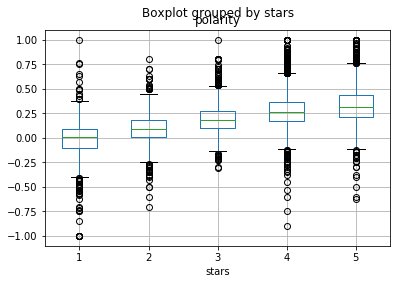

In [25]:
yelp.boxplot(column='polarity', by='stars');

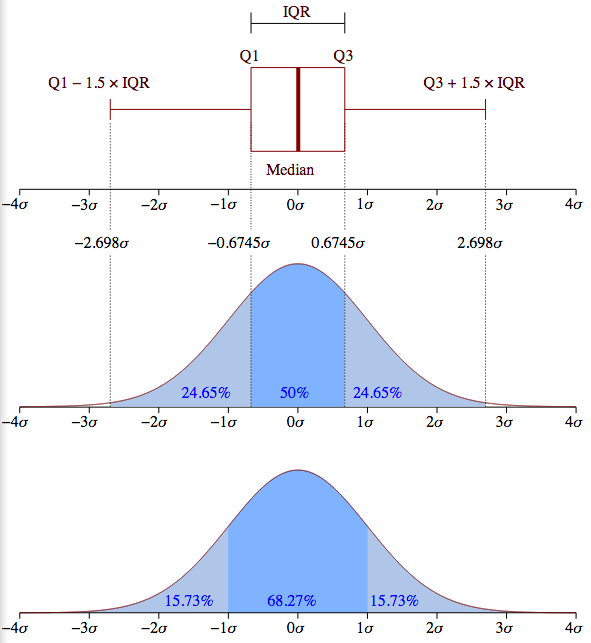

## Text Classification

I'am going to train a machine learning algorithm to classify yelp reviews as either five or one stars. But first we need to transform or "vectorize" our raw text before make any classifications.

## Count Vectorizer: turn text into numbers

In [26]:
# I'am gointo to create a new DataFrame called yelp_best_worst that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

In [27]:
stars = []
for elem in yelp_best_worst.stars:
    if elem == 5:
        stars.append(1)
    else:
        stars.append(0)

In [28]:
yelp_best_worst["stars"] = stars

/Users/anapaulavarejao/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
#Null accuracy
yelp_best_worst.stars.value_counts(normalize=True)
# 1 best / 0 worst

1    0.816691
0    0.183309
Name: stars, dtype: float64

In [30]:
# X and y
X = yelp_best_worst.text
y = yelp_best_worst.stars

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [31]:
#Pipeline for countvectorizer and naive bayes model
pipe_cv = make_pipeline(CountVectorizer(), MultinomialNB())

#Intialize parameters for count vectorizer
param_grid_cv = {}
param_grid_cv["countvectorizer__max_features"] = [1000, 2500 ,5000, 7500,10000]
param_grid_cv["countvectorizer__ngram_range"] = [(1,1), (1,2), (2,2)]
param_grid_cv["countvectorizer__lowercase"] = [True, False]

In [32]:
#Let's import time to see how long it takes
from time import time

In [33]:
#Grid search for the count vectorizer
grid_cv = GridSearchCV(pipe_cv, param_grid_cv, cv = 5, scoring = "accuracy")

#initialize time stamp
t = time()
#fit grid search object
grid_cv.fit(X_train, y_train)
#Print time elapsed
print time() - t

162.732744932


In [34]:
#Best parameters
grid_cv.best_params_

{'countvectorizer__lowercase': True,
 'countvectorizer__max_features': 10000,
 'countvectorizer__ngram_range': (1, 1)}

In [35]:
#Best score
grid_cv.best_score_

0.9262402088772846

In [36]:
y_pred = grid_cv.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [38]:
print classification_report(y_test, y_pred)
print confusion_matrix(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.77      0.80      0.78       184
          1       0.96      0.95      0.95       838

avg / total       0.92      0.92      0.92      1022

[[147  37]
 [ 44 794]]


In [39]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
tot_a_1 = TN + FP
tot_a_2 = FN + TP
tot_p_1 = TN + FN
tot_p_2 = FP + TP
tot_g = tot_a_1+tot_a_2
mx =np.array(["TN",TN,"FP",FP,tot_a_1,"FN",FN,"TP", TP, tot_a_2,"", tot_p_1,"", tot_p_2, tot_g]).reshape(3,5)
cols = [" ","pred0", " ", "pred1",  "total"]
index = ["corr0", "corr1", "total"]
cm_df = pd.DataFrame(mx, columns=cols, index=index )
print cm_df
print "\t"
tpr = round(TP / float(TP + FN),4)
tnr = round(TN / float(TN + FP),4)
fpr = round(FP / float(TN + FP),4)
fnr = round(FN / float(FN + TP),4)
print "Sensitivity or Recall or True Positive Rate - TPR:", tpr*100, "%"
print "Specificity or True Negative Rate - TNR:", tnr*100,"%"
print "False Positive Rate - FPR:", fpr*100,"%"
print "False Negative Rate - FNR:", fnr*100,"%"

          pred0     pred1 total
corr0  TN   147  FP    37   184
corr1  FN    44  TP   794   838
total       191       831  1022
	
Sensitivity or Recall or True Positive Rate - TPR: 94.75 %
Specificity or True Negative Rate - TNR: 79.89 %
False Positive Rate - FPR: 20.11 %
False Negative Rate - FNR: 5.25 %


### ROC Curve

In [73]:
# store the predicted probabilities for class 1 (class 1 = Best)
y_pred_prob_grid_cv = grid_cv.predict_proba(X_test)[:, 1]
y_pred_prob_grid_cv

array([  1.00000000e+00,   9.94161288e-01,   9.99999993e-01, ...,
         1.00000000e+00,   6.34360960e-26,   9.99494824e-01])

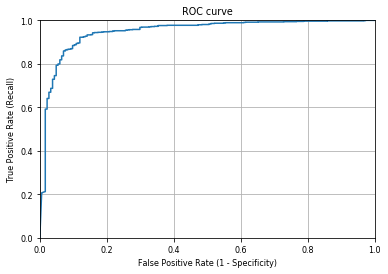

In [77]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_grid_cv)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)

In [76]:
round(roc_auc_score(y_test, y_pred_prob_grid_cv),3)

0.948